H2. “Los países productores de Arabica concentran un mayor valor total que los productores de Robusta.”


Cargar datos y dejar columnas limpias

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("src/data/Coffee_production_long.csv") 

df.columns = df.columns.str.strip()
df["País"] = df["País"].astype(str).str.strip()
df["Coffee type"] = df["Coffee type"].astype(str).str.strip()

df["Total_production"] = pd.to_numeric(df["Total_production"], errors="coerce")
df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")

df = df.dropna(subset=["Total_production", "Year", "Coffee type", "País"])

df.head()


,País,Coffee type,Total_production,Year
0,Angola,Robusta/Arabica,3.000000e+06,1990
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,1990
2,Brazil,Arabica/Robusta,1.637160e+09,1990
3,Burundi,Arabica/Robusta,2.922000e+07,1990
4,Ecuador,Arabica/Robusta,9.024000e+07,1990


Crear “tipo dominante” (Arabica vs Robusta)

In [21]:
df["Dominant_type"] = df["Coffee type"].str.split("/").str[0].str.strip()

df["Dominant_type"].value_counts()


Dominant_type
Arabica    900
Robusta    750
Name: count, dtype: int64

Calcular el “valor total” por tipo (suma de producción total)

In [22]:
totales = df.groupby("Dominant_type", as_index=False)["Total_production"].sum()
totales = totales.sort_values("Total_production", ascending=False)

totales


,Dominant_type,Total_production
0,Arabica,1.546369e+11
1,Robusta,7.109790e+10


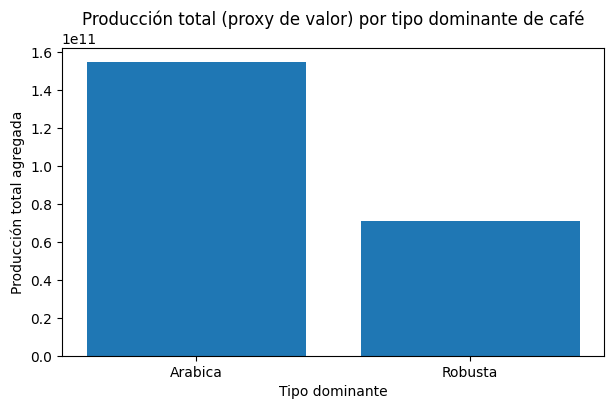

(154636920000.0, 71097900000.0, 'CONFIRMADA')

In [23]:
plt.figure(figsize=(7,4))
plt.bar(totales["Dominant_type"], totales["Total_production"])
plt.title("Producción total (proxy de valor) por tipo dominante de café")
plt.xlabel("Tipo dominante")
plt.ylabel("Producción total agregada")
plt.show()

arabica_total = float(totales.loc[totales["Dominant_type"] == "Arabica", "Total_production"].iloc[0]) if (totales["Dominant_type"] == "Arabica").any() else 0.0
robusta_total = float(totales.loc[totales["Dominant_type"] == "Robusta", "Total_production"].iloc[0]) if (totales["Dominant_type"] == "Robusta").any() else 0.0

resultado = "CONFIRMADA" if arabica_total > robusta_total else "RECHAZADA"

arabica_total, robusta_total, resultado


Tras agregar la producción total por tipo dominante de café, se observa que el valor total asociado al café Arábica es mayor que el correspondiente al café Robusta. Dado que la producción total se utiliza como proxy del valor económico, los resultados permiten confirmar la hipótesis planteada.

El dataset no incluye precios, por lo que se utilizó la producción total como proxy del valor económico. Para evitar el doble conteo de países con producción mixta, se asignó un tipo dominante de café a cada país.

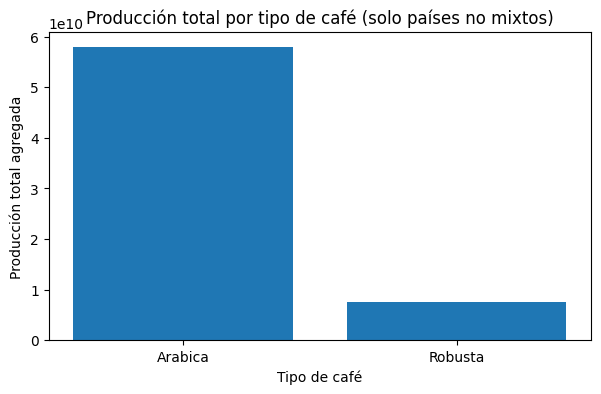

(57968520000.0, 7617780000.0, 'CONFIRMADA')

In [24]:
df_puro = df[df["Coffee type"].isin(["Arabica", "Robusta"])]

totales_puros = (
    df_puro
    .groupby("Coffee type", as_index=False)["Total_production"]
    .sum()
    .sort_values("Total_production", ascending=False)
)

plt.figure(figsize=(7,4))
plt.bar(totales_puros["Coffee type"], totales_puros["Total_production"])
plt.title("Producción total por tipo de café (solo países no mixtos)")
plt.xlabel("Tipo de café")
plt.ylabel("Producción total agregada")
plt.show()

arabica_puro = float(totales_puros.loc[totales_puros["Coffee type"] == "Arabica", "Total_production"].iloc[0]) if (totales_puros["Coffee type"] == "Arabica").any() else 0.0
robusta_puro = float(totales_puros.loc[totales_puros["Coffee type"] == "Robusta", "Total_production"].iloc[0]) if (totales_puros["Coffee type"] == "Robusta").any() else 0.0

resultado_puro = "CONFIRMADA" if arabica_puro > robusta_puro else "RECHAZADA"

arabica_puro, robusta_puro, resultado_puro


Para reforzar los resultados, se repitió el análisis excluyendo los países con producción mixta de Arábica y Robusta. Los resultados obtenidos mantienen la misma conclusión que el análisis principal, lo que refuerza la validez de la hipótesis planteada.

Evolución en el tiempo

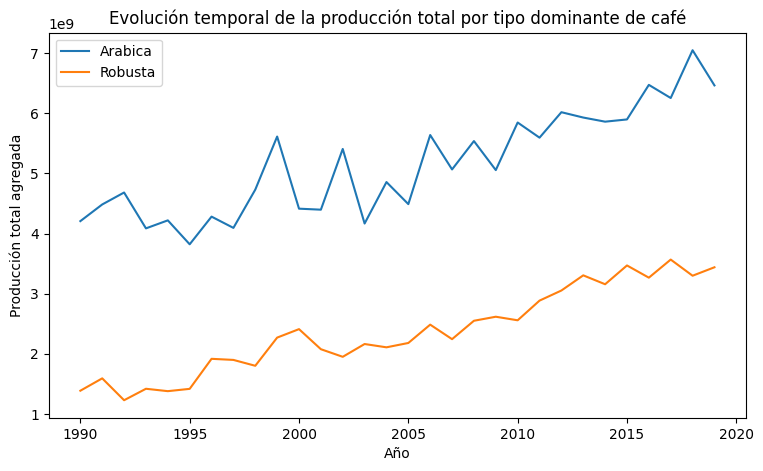

In [25]:
evolucion = (
    df
    .groupby(["Year", "Dominant_type"], as_index=False)["Total_production"]
    .sum()
)

evolucion_pivot = evolucion.pivot( #pivotar = Girar la tabla para que una columna pase a ser encabezados.
    index="Year",
    columns="Dominant_type",
    values="Total_production"
)

plt.figure(figsize=(9,5))
plt.plot(evolucion_pivot.index, evolucion_pivot["Arabica"], label="Arabica")
plt.plot(evolucion_pivot.index, evolucion_pivot["Robusta"], label="Robusta")
plt.title("Evolución temporal de la producción total por tipo dominante de café")
plt.xlabel("Año")
plt.ylabel("Producción total agregada")
plt.legend()
plt.show()

